In [28]:
import graspy.models as gm
from graspy.simulations import sbm
from graspy.plot import heatmap
from graspy.utils import symmetrize

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [29]:
G = nx.karate_club_graph()

In [36]:
sbme = gm.DCSBMEstimator(directed = False, loops = False, n_components = 2,max_comm = 2)
sbme.fit(G)

DCSBMEstimator(cluster_kws={}, degree_directed=False, directed=False,
               embed_kws={}, loops=False, max_comm=2, min_comm=1,
               n_components=2)

In [37]:
def draw_communities(vassmt,G):
    nx.kamada_kawai_layout(G)
    communities = []
    
    zi = dict(enumerate(vassmt))
    cnum = len(set(zi.values()))
    
    for c in range(cnum):
        communities.append(get_idx(zi, c))
    
    plt.figure(figsize = (12,8))
    nx.draw_networkx_edges(G,pos = pos)
    
    for community, color in zip(communities, colors):
        nx.draw_networkx_nodes(G,pos = pos, nodelist = community, node_color = color, node_size = 640)
    nx.draw_networkx_labels(G,pos = pos)
    _ = plt.axis("off")
    
colors = ['red','cyan','yellow','magenta','gree','blue','black']

def get_idx(nums, cid):
    vertices = []
    
    for k,v in nums.items():
        if v == cid: vertices.append(k)
    return vertices

In [38]:
print("SBM \"M\" matrix:"); print(sbme.block_p_)

SBM "M" matrix:
[[66. 10.]
 [10. 70.]]


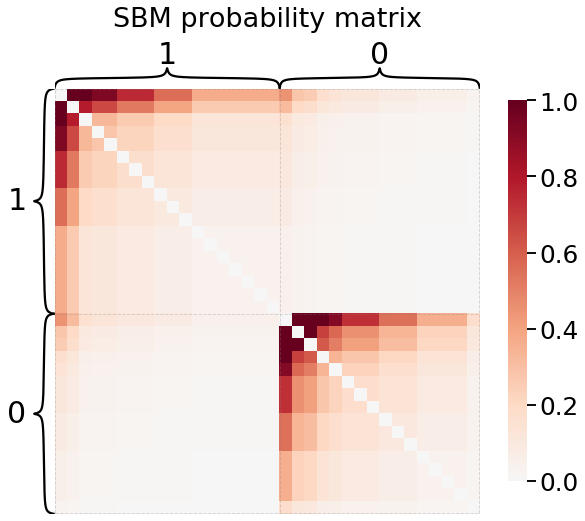

In [39]:
heatmap(sbme.p_mat_, inner_hier_labels = sbme.vertex_assignments_, vmin = 0,
       vmax = 1, font_scale = 1.5, title = "SBM probability matrix", sort_nodes =True)

C:\Users\entity\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


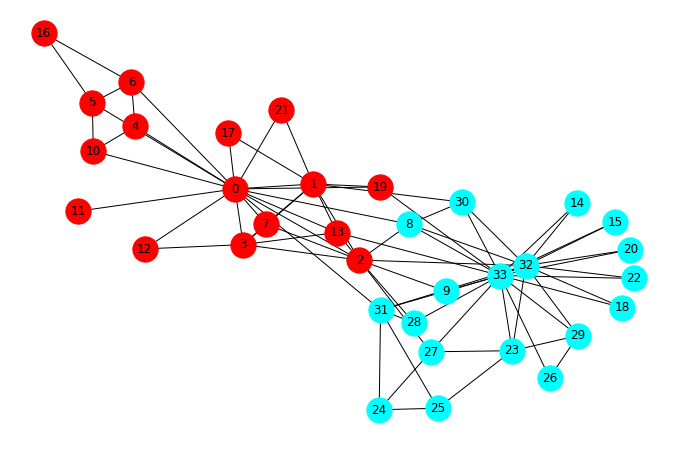

In [40]:
pos = nx.spring_layout(G)
draw_communities(sbme.vertex_assignments_,G)